In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

c:\python\project\.venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python\project\.venv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\python\project\.venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('./inv1_emi_data_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[5]},
                index_col=['datetime']
                )

In [3]:
df['time'] = df.index
df.loc[:,'year'] = pd.Series(df.index.year, df.index)
df.loc[:,'month'] = pd.Series(df.index.month, df.index)
df.loc[:,'day'] = pd.Series(df.index.day, df.index)
df.loc[:,'hour'] = pd.Series(df.index.hour, df.index)
df.loc[:,'dayofweek'] = pd.Series(df.index.dayofweek, df.index)
df.loc[:,'dayname'] = pd.Series(df.index.day_name(), df.index)
df.loc[:,'hourofweek'] = pd.Series((df.hour+24*df.dayofweek), df.index)
df.loc[:,'hourofmonth'] = pd.Series((df.hour+24*(df.day-1)), df.index)
df.loc[:,'Tcell']=pd.Series((df['Ambient temperature(℃)']+df['Irradiance(W/㎡)']/800*(25-20)), df.index)
df.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df['Irradiance(W/㎡)']/1000*(1+0.0045*(df['Tcell']-25))*20.5/100), df.index)
df.loc[:,'Hieu suat']=pd.Series((df['Total input power(kW)']*1000/df['Pm']*100), df.index)
df.loc[:,'date'] = pd.Series(df.index.date, df.index)
df=df[df['Ambient temperature(℃)']>6]
df=df[df['Irradiance(W/㎡)']>300]
df=df[df['Total input power(kW)']>76]

In [4]:
df1=df.groupby(['month','date','hour'])['Hieu suat','Total input power(kW)'].mean()
df1=df1.reset_index()
df1=df1[df1.groupby(['month','date'])['Hieu suat'].transform(max)==df1['Hieu suat']]
df1=df1.reset_index()
df1=df1[df1['Hieu suat']<80]
df1=df1[df1['Hieu suat']>65]
print(df1)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 1 "))
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 1 "))
fig . update_traces (
    showlegend = True 
    )
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

     index  month        date  hour  Hieu suat  Total input power(kW)
0        0      3  2022-03-04    10  77.559708              90.436333
1        2      3  2022-03-19    12  76.075859              87.386500
2        9      3  2022-03-22    14  74.112901              82.825286
3       10      3  2022-03-23     9  76.147247              82.211800
4       20      3  2022-03-24    14  75.076001              82.101286
..     ...    ...         ...   ...        ...                    ...
136    750      8  2022-08-19    11  65.694256             100.359000
137    759      8  2022-08-21    15  79.736302              79.152000
138    765      8  2022-08-22    14  70.947101              81.149714
139    771      8  2022-08-23    14  71.845824              81.204000
140    777      8  2022-08-24    15  74.114419              85.237500

[136 rows x 6 columns]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6696\3129581317.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(['month','date','hour'])['Hieu suat','Total input power(kW)'].mean()


In [5]:
df1['stt']=df1.index
df_binary = df1[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_binary.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_binary.head() 
  
# Displaying only the 1st  rows along with the column names 

,stt,Hieu suat
0,0,77.559708
1,1,76.075859
2,2,74.112901
3,3,76.147247
4,4,75.076001


0.3390689046862204


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6696\3909986184.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6696\3909986184.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



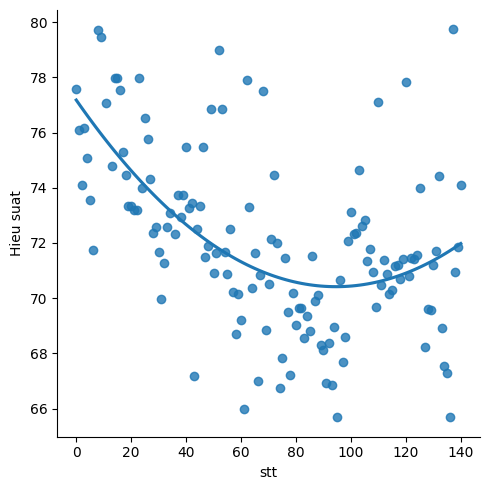

In [6]:
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary, order = 2, ci = None)
# Eliminating NaN or missing input numbers 
df_binary.fillna(method ='ffill', inplace = True)
X = np.array(df_binary['stt']).reshape(-1, 1) 
y = np.array(df_binary['Hieu suat']).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
df_binary.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

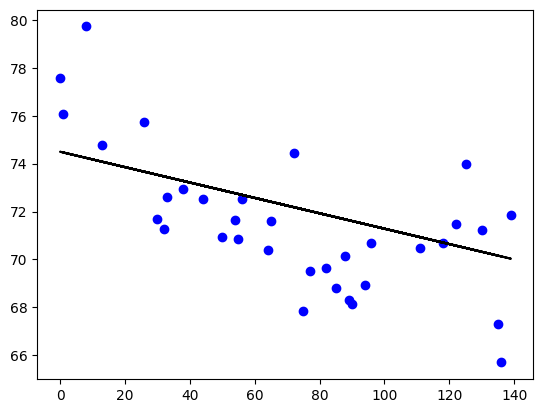

In [7]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

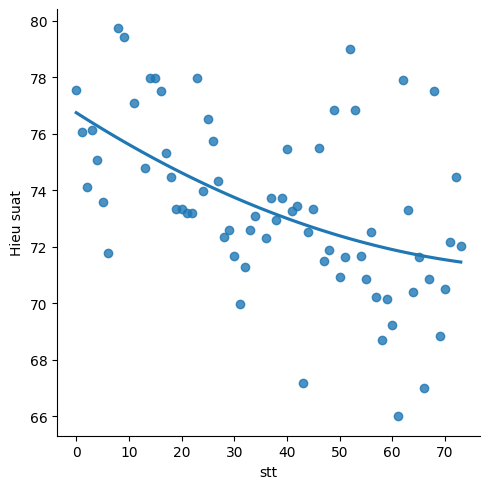

In [8]:
df_binary1 = df_binary[:][:70]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary1, 
                               order = 2, ci = None)

In [9]:
df_binary1.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary1['stt']).reshape(-1, 1) 
y = np.array(df_binary1['Hieu suat']).reshape(-1, 1) 
  
df_binary1.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.5496632225394751


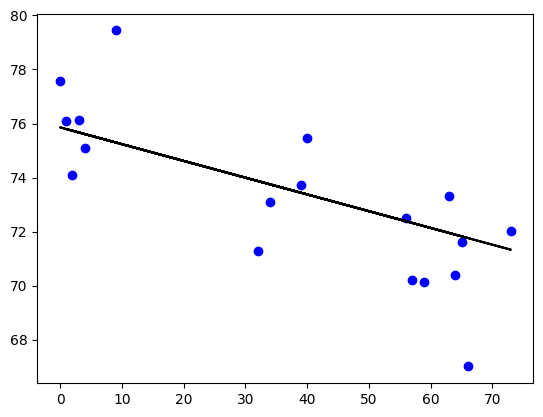

In [10]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

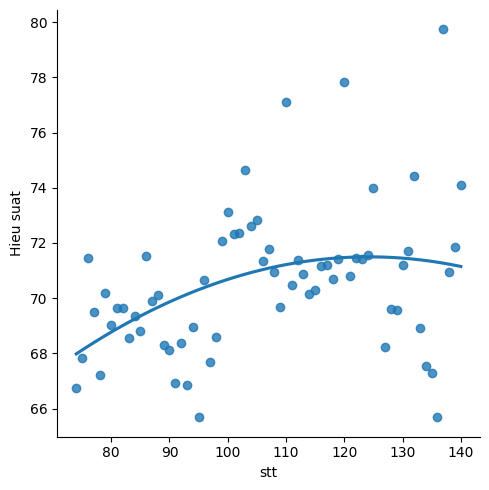

In [11]:
df_binary2 = df_binary[:][70:142]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary2, 
                               order = 2, ci = None)

In [12]:
df_binary2.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary2['stt']).reshape(-1, 1) 
y = np.array(df_binary2['Hieu suat']).reshape(-1, 1) 
  
df_binary2.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.029159674603900898


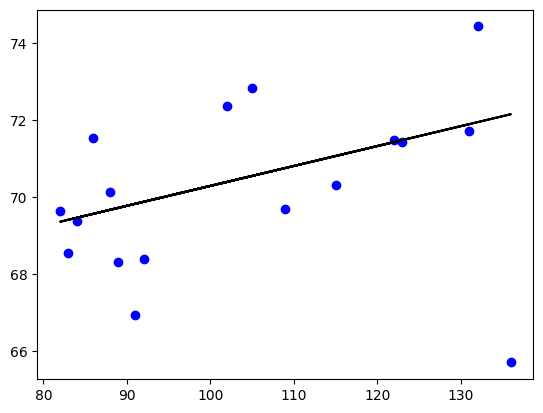

In [13]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 